In [1]:
# Criado pelo cientista Felipe Gollino (felipe.gollino@itau-unibanco.com.br), 
# qualquer dúvida podem nos procurar: Silvia Azevedo do Santos Cucatti (paula.cucatti@itau-unibanco.com.br) ou Paula Kintschev Santana de Moraes (paula.kintschev@itau-unibanco.com.br)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))
display(HTML('<style>.output_result { max-width:100% !important; }</style>'))

pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 200

__PROBLEMA!!!__

Overview
The data has been split into two groups:

* training set (train.csv)
* test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary

|Variable| Definition| Key|
|-|-|-|
|survival| Survival| 0 = No, 1 = Yes|
|pclass| Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd|
|sex| Sex| |
|Age| Age in years| |
|sibsp| # of siblings / spouses aboard the Titanic| |
|parch| # of parents / children aboard the Titanic| |	
|ticket| Ticket number|	|
|fare| Passenger fare| |
|cabin| Cabin number| |
|embarked| Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

Variable Notes
pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
train_orig = pd.read_csv('Titanic_Machine_Learning_for_Disaster/train.csv')
test_orig  = pd.read_csv('Titanic_Machine_Learning_for_Disaster/test.csv')

In [4]:
print(train_orig.shape)
train_orig.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


__Analisando as informações recebidas__

In [6]:
for i in train_orig.columns:
    print(i)
    print(train_orig[i].value_counts().head())
    print('únicos:', train_orig[i].nunique())
    print('_'*100)

PassengerId
891    1
293    1
304    1
303    1
302    1
Name: PassengerId, dtype: int64
únicos: 891
____________________________________________________________________________________________________
Survived
0    549
1    342
Name: Survived, dtype: int64
únicos: 2
____________________________________________________________________________________________________
Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
únicos: 3
____________________________________________________________________________________________________
Name
Johnson, Mr. Malkolm Joackim        1
Reeves, Mr. David                   1
Mitkoff, Mr. Mito                   1
Madigan, Miss. Margaret "Maggie"    1
Rice, Master. George Hugh           1
Name: Name, dtype: int64
únicos: 891
____________________________________________________________________________________________________
Sex
male      577
female    314
Name: Sex, dtype: int64
únicos: 2
____________________________________________________________

__Devemos usar todos os dados disponiveis?__

In [7]:
train_orig.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_orig.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


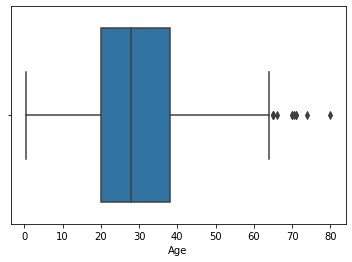

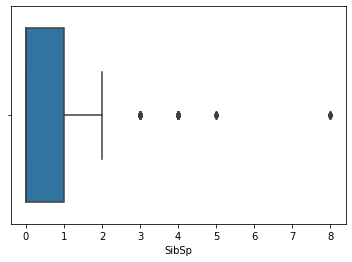

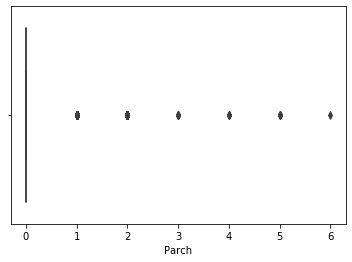

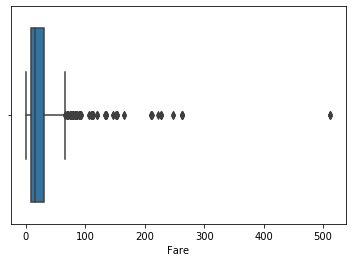

In [9]:
for i in ['Age','SibSp', 'Parch', 'Fare']:
    plt.figure()
    ax = sns.boxplot(x=train_orig[i])

In [10]:
train_orig.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johnson, Mr. Malkolm Joackim",male,1601,B96 B98,S
freq,1,577,7,4,644


In [11]:
train = train_orig.copy()

__IMPORTANTE: Qual a pergunta queremos responder?__

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__Todas as variaveis são boas para entrar no nosso modelo? Se não, quais as variaveis devem ser escolhidas?__

In [13]:
train.drop(['Ticket'], axis=1, inplace=True)
train.drop(['Name'], axis=1, inplace=True)
train.drop(['PassengerId'], axis=1, inplace=True)

__E a CABINE seria uma informação útil?__

In [14]:
train[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Cabin')

,Cabin,Survived
0,A10,0.000000
1,A14,0.000000
2,A16,1.000000
3,A19,0.000000
4,A20,1.000000
5,A23,1.000000
6,A24,0.000000
7,A26,1.000000
8,A31,1.000000
9,A32,0.000000


In [15]:
train.isna().sum().Cabin / train_orig.shape[0]

0.7710437710437711

In [16]:
train.drop(['Cabin'], axis=1, inplace=True)

__E a AGE seria uma informação útil?__

In [17]:
train.isna().sum().Age / train_orig.shape[0]

0.19865319865319866

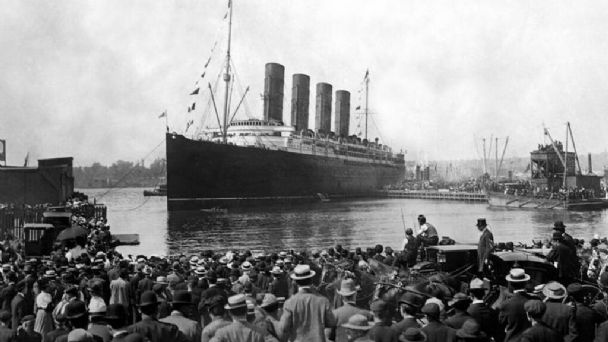

In [18]:
train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Age')

,Age,Survived
0,0.42,1.000000
1,0.67,1.000000
2,0.75,1.000000
3,0.83,1.000000
4,0.92,1.000000
5,1.00,0.714286
6,2.00,0.300000
7,3.00,0.833333
8,4.00,0.700000
9,5.00,1.000000


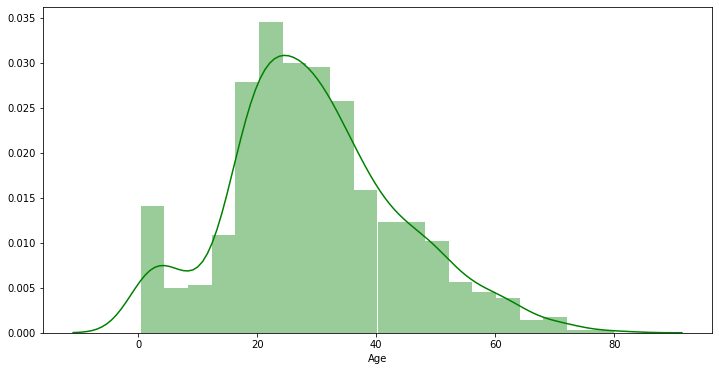

In [19]:
plt.figure(figsize=(12,6))
sns.distplot(train.Age, color='green');

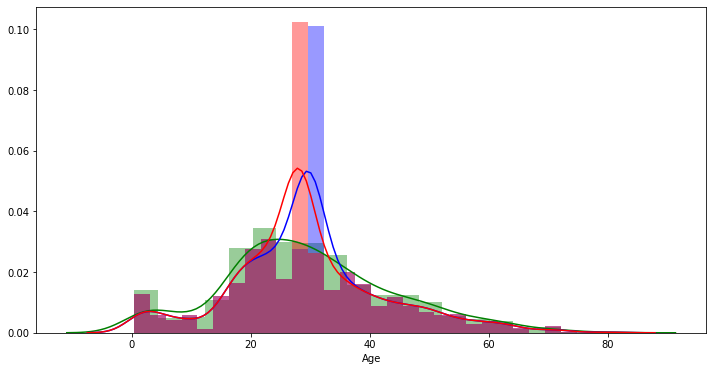

In [20]:
plt.figure(figsize=(12,6))
sns.distplot(train.Age, color='green');
sns.distplot(train.Age.fillna(train.Age.mean()), color='blue')
sns.distplot(train.Age.fillna(train.Age.median()), color='red');

In [21]:
train.Age.fillna(train.Age.median(), inplace=True)

In [22]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [23]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [24]:
train['AgeBand'].value_counts().sort_index()

(0.34, 16.336]      100
(16.336, 32.252]    523
(32.252, 48.168]    188
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: AgeBand, dtype: int64

In [25]:
train['AgeLabel'] = train['Age'].copy().astype(int)
train.loc[(train['AgeLabel'] <= 16, 'AgeLabel')] = 0
train.loc[(train['AgeLabel'] > 16) & (train['AgeLabel'] <= 32), 'AgeLabel'] = 1
train.loc[(train['AgeLabel'] > 32) & (train['AgeLabel'] <= 48), 'AgeLabel'] = 2
train.loc[(train['AgeLabel'] > 48) & (train['AgeLabel'] <= 64), 'AgeLabel'] = 3
train.loc[(train['AgeLabel'] > 64, 'AgeLabel')] = 4
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand,AgeLabel
0,0,3,male,22.0,1,0,7.2500,S,"(16.336, 32.252]",1
1,1,1,female,38.0,1,0,71.2833,C,"(32.252, 48.168]",2
2,1,3,female,26.0,0,0,7.9250,S,"(16.336, 32.252]",1
3,1,1,female,35.0,1,0,53.1000,S,"(32.252, 48.168]",2
4,0,3,male,35.0,0,0,8.0500,S,"(32.252, 48.168]",2


In [26]:
train.drop(['AgeBand'], axis=1, inplace=True)

In [27]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
AgeLabel    0
dtype: int64

__e para EMBARKED?__

In [28]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Embarked')

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [30]:
train.Embarked.fillna(train.Embarked.mode()[0], inplace=True)

In [31]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
AgeLabel    0
dtype: int64

__Continuando a preparação dos dados com o engenharia de variaveis (feature engineering)__

In [32]:
train.Embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [33]:
aux_embarked = pd.get_dummies(train.Embarked, prefix='Embarked')
aux_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [34]:
train = train.join(aux_embarked)
train.drop(['Embarked'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,AgeLabel,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,2,1,0,0
2,1,3,female,26.0,0,0,7.9250,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,2,0,0,1
4,0,3,male,35.0,0,0,8.0500,2,0,0,1


__e a variavel FARE?__

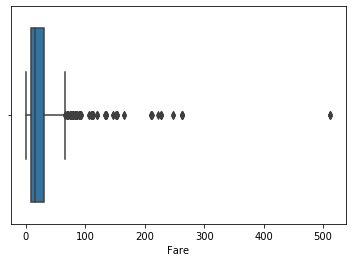

In [35]:
ax = sns.boxplot(x=train['Fare'])

In [36]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [37]:
train['FareBand'].value_counts().sort_index()

(-0.001, 7.91]     223
(7.91, 14.454]     224
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: FareBand, dtype: int64

In [38]:
train['FareLabel'] = train['Fare'].copy().astype(int)
train.loc[(train['Fare'] <= 7.91, 'FareLabel')] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'FareLabel'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31.0), 'FareLabel']   = 2
train.loc[(train['Fare'] > 31.0, 'FareLabel')] = 3
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,AgeLabel,Embarked_C,Embarked_Q,Embarked_S,FareBand,FareLabel
0,0,3,male,22.0,1,0,7.2500,1,0,0,1,"(-0.001, 7.91]",0
1,1,1,female,38.0,1,0,71.2833,2,1,0,0,"(31.0, 512.329]",3
2,1,3,female,26.0,0,0,7.9250,1,0,0,1,"(7.91, 14.454]",1
3,1,1,female,35.0,1,0,53.1000,2,0,0,1,"(31.0, 512.329]",3
4,0,3,male,35.0,0,0,8.0500,2,0,0,1,"(7.91, 14.454]",1


In [39]:
train.drop(['Fare', 'FareBand'], axis=1, inplace=True)

__Será que podemos encontrar alguma informação interessante em dentro de acordo com o tamanho da família?__

In [40]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [41]:
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


__transformando a variavel SEX?__

In [42]:
train.Sex = train.Sex.map({'male':0, 'female':1})
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,AgeLabel,Embarked_C,Embarked_Q,Embarked_S,FareLabel,FamilySize,IsAlone
0,0,3,0,22.0,1,0,1,0,0,1,0,2,0
1,1,1,1,38.0,1,0,2,1,0,0,3,2,0
2,1,3,1,26.0,0,0,1,0,0,1,1,1,1
3,1,1,1,35.0,1,0,2,0,0,1,3,2,0
4,0,3,0,35.0,0,0,2,0,0,1,1,1,1


In [43]:
X = train.drop(['Survived'], axis=1)
y = train.Survived

feature_names = list(X.columns)

In [44]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,AgeLabel,Embarked_C,Embarked_Q,Embarked_S,FareLabel,FamilySize,IsAlone
0,3,0,22.0,1,0,1,0,0,1,0,2,0
1,1,1,38.0,1,0,2,1,0,0,3,2,0
2,3,1,26.0,0,0,1,0,0,1,1,1,1
3,1,1,35.0,1,0,2,0,0,1,3,2,0
4,3,0,35.0,0,0,2,0,0,1,1,1,1


In [45]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [46]:
feature_names

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'AgeLabel',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'FareLabel',
 'FamilySize',
 'IsAlone']

__Tranformando o arquivo de teste__

In [47]:
test_orig.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
test_orig.shape

(418, 11)

In [49]:
test_orig.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [50]:
test_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [51]:
test = test_orig.copy()

In [52]:
test.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)
test.Age.fillna(test.Age.median(), inplace=True)

test['AgeLabel'] = test['Age'].copy().astype(int)
test.loc[(test['Age'] <= 16, 'AgeLabel')] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'AgeLabel'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'AgeLabel'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'AgeLabel'] = 3
test.loc[(test['Age'] > 64, 'AgeLabel')] = 4

test.Embarked.fillna(test.Embarked.mode()[0], inplace=True)

aux_embarked = pd.get_dummies(test.Embarked, prefix='Embarked')
test = test.join(aux_embarked)
test.drop(['Embarked'], axis=1, inplace=True)

test.Sex = test.Sex.map({'male':0, 'female':1})

test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test['FareLabel'] = test['Fare'].copy().astype(int)
test.loc[(test['Fare'] <= 7.91, 'FareLabel')] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'FareLabel'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31.0), 'FareLabel']   = 2
test.loc[(test['Fare'] > 31.0, 'FareLabel')] = 3
test.drop(['Fare'], axis=1, inplace=True)

test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

In [53]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,AgeLabel,Embarked_C,Embarked_Q,Embarked_S,FareLabel,FamilySize,IsAlone
0,3,0,34.5,0,0,2,0,1,0,0,1,1
1,3,1,47.0,1,0,2,0,0,1,0,2,0
2,2,0,62.0,0,0,3,0,1,0,1,1,1
3,3,0,27.0,0,0,1,0,0,1,1,1,1
4,3,1,22.0,1,1,1,0,0,1,1,3,0


__Tudo pronto... vamos começar a modelar \o/ (Ufaaa... finalmente!!!)__

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=147)

In [55]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,AgeLabel,Embarked_C,Embarked_Q,Embarked_S,FareLabel,FamilySize,IsAlone
203,3,0,45.5,0,0,2,1,0,0,0,1,1
111,3,1,14.5,1,0,0,1,0,0,2,2,0
582,2,0,54.0,0,0,3,0,0,1,2,1,1
175,3,0,18.0,1,1,1,0,0,1,0,3,0
587,1,0,60.0,1,1,3,1,0,0,3,3,0


In [56]:
y_train.head()

203    0
111    0
582    0
175    0
587    1
Name: Survived, dtype: int64

In [57]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,AgeLabel,Embarked_C,Embarked_Q,Embarked_S,FareLabel,FamilySize,IsAlone
136,1,1,19.0,0,2,1,0,0,1,2,3,0
856,1,1,45.0,1,1,2,0,0,1,3,3,0
345,2,1,24.0,0,0,1,0,0,1,1,1,1
619,2,0,26.0,0,0,1,0,0,1,1,1,1
43,2,1,3.0,1,2,0,1,0,0,3,4,0


In [58]:
y_test.head()

136    1
856    1
345    1
619    0
43     1
Name: Survived, dtype: int64

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

__Logistic Regression__

É um algoritmo de classificação usado quando a variável de resposta é categórica. A ideia da Regressão Logística é encontrar uma relação entre as características e a probabilidade de um resultado específico.

In [60]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter = 500000)
lr_model.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_model, X_train_std, y_train, cv=10)
scores

array([0.86567164, 0.7761194 , 0.79104478, 0.79104478, 0.80597015,
       0.80597015, 0.76119403, 0.80597015, 0.8030303 , 0.75757576])

In [62]:
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,AgeLabel,Embarked_C,Embarked_Q,Embarked_S,FareLabel,FamilySize,IsAlone
203,3,0,45.5,0,0,2,1,0,0,0,1,1
111,3,1,14.5,1,0,0,1,0,0,2,2,0


In [63]:
X_train_std[0]

array([ 0.8198491 , -0.74396799,  1.20599373, -0.4770253 , -0.47986752,
        0.83881905,  2.06393859, -0.31125573, -1.60978193, -1.34030303,
       -0.56106288,  0.82620799])

In [64]:
X_train_std[1]

array([ 0.8198491 ,  1.34414385, -1.14916645,  0.39839476, -0.47986752,
       -1.58161777,  2.06393859, -0.31125573, -1.60978193,  0.44855296,
        0.04539344, -1.21034898])

In [65]:
y_pred = lr_model.predict(X_test_std)
y_real = y_test.values

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_real, y_pred)

0.7847533632286996

In [67]:
from sklearn.metrics import precision_score
precision_score(y_real, y_pred, average='macro')

0.7704817158931083

In [68]:
from sklearn.metrics import recall_score
recall_score(y_real, y_pred, average='macro')

0.764802065404475

In [69]:
from sklearn.metrics import f1_score
f1_score(y_real, y_pred, average='macro')

0.7673448095983306

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_real, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       140
           1       0.72      0.69      0.70        83

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_real, y_pred)

array([[118,  22],
       [ 26,  57]], dtype=int64)

In [72]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0], dtype=int64)

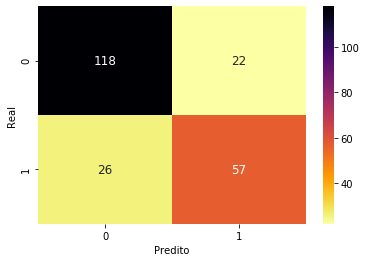

In [73]:
df_cm = pd.DataFrame({'y_real': y_real, 'y_pred': y_pred})
cm = pd.crosstab(df_cm['y_real'], df_cm['y_pred'], rownames=['Real'], colnames=['Predito'])
sns.heatmap(cm, annot=True, annot_kws={'size': 12}, fmt='d', cmap='inferno_r')
plt.show()

__Tunando os hiperparâmentros (Grid Search)__

In [74]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

__Definindo o grid de hiperparâmentros__

In [75]:
gridsearch_lr = dict()
gridsearch_lr['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
gridsearch_lr['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
gridsearch_lr['C'] = loguniform(1e-5, 100)

gridsearch_lr

{'solver': ['newton-cg', 'lbfgs', 'liblinear'],
 'penalty': ['none', 'l1', 'l2', 'elasticnet'],
 'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x2e5ba540a08>}

In [76]:
search = RandomizedSearchCV(lr_model, gridsearch_lr, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5, random_state=147, verbose=1)

In [77]:
result = search.fit(X_train_std, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1440 tasks      | elapsed:    5.8s


Best Score: 0.7978678038379532
Best Hyperparameters: {'C': 0.021720591320214755, 'penalty': 'l2', 'solver': 'newton-cg'}


[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    7.2s finished


In [78]:
accuracy_score(y_real, y_pred)

0.7847533632286996

In [79]:
lr_model_pos = LogisticRegression(C= 0.021720591320214755, penalty= 'l2', solver= 'newton-cg', max_iter = 500000)
lr_model_pos.fit(X_train_std, y_train)

scores = cross_val_score(lr_model, X_train_std, y_train, cv=10)
print(scores)

y_pred = lr_model_pos.predict(X_test_std)
y_real = y_test.values

accuracy_score(y_real, y_pred)

[0.86567164 0.7761194  0.79104478 0.79104478 0.80597015 0.80597015
 0.76119403 0.80597015 0.8030303  0.75757576]


0.8116591928251121

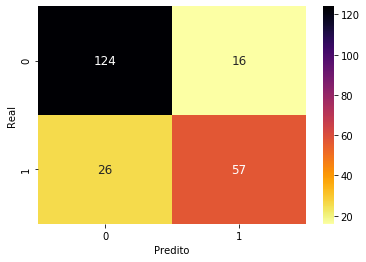

In [80]:
df_cm = pd.DataFrame({'y_real': y_real, 'y_pred': y_pred})
cm = pd.crosstab(df_cm['y_real'], df_cm['y_pred'], rownames=['Real'], colnames=['Predito'])
sns.heatmap(cm, annot=True, annot_kws={'size': 12}, fmt='d', cmap='inferno_r')
plt.show()

In [81]:
tn, fp, fn, tp = confusion_matrix(y_real, y_pred).ravel()
(tn, fp, fn, tp)

(124, 16, 26, 57)

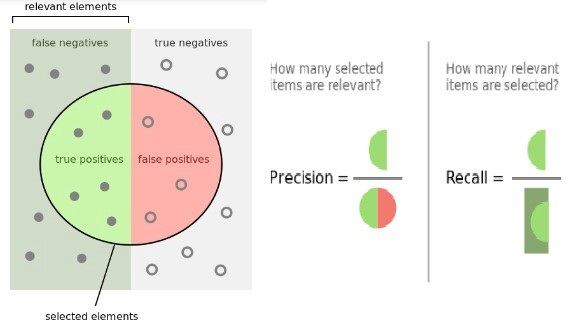

In [82]:
def metrics(tn, fp, fn, tp):
    acuracia = (tp + tn) / (tp + tn + fp + fn)
    precisao = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precisao * recall) / (precisao + recall)
    return acuracia, precisao, recall, f1 

metrics(tn, fp, fn, tp)

(0.8116591928251121,
 0.7808219178082192,
 0.6867469879518072,
 0.7307692307692306)

In [83]:
probs = lr_model.predict_proba(X_test_std)
probs[:5]

array([[0.04328985, 0.95671015],
       [0.1411306 , 0.8588694 ],
       [0.18151034, 0.81848966],
       [0.75370691, 0.24629309],
       [0.08507236, 0.91492764]])

In [84]:
probs = probs[:, 1]
probs[:5]

array([0.95671015, 0.8588694 , 0.81848966, 0.24629309, 0.91492764])

In [85]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

In [86]:
def plot_roc_curve(fpr, tpr):
    auc = roc_auc_score(y_test, probs)
    plt.figure(figsize=(12,6))
    plt.plot(fpr, tpr, color='orange', linewidth=2, label='AUROC: '+str('{:.3f}'.format(auc)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('real Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

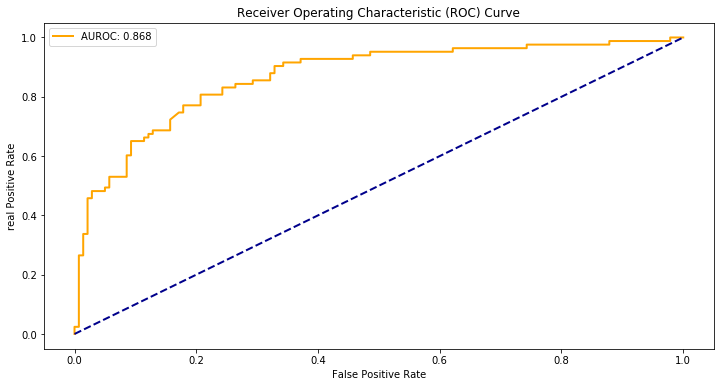

In [87]:
from sklearn.metrics import roc_auc_score
plot_roc_curve(fpr, tpr)

In [88]:
importance = pd.DataFrame(feature_names)
importance.columns = ['Feature']
importance["Correlation"] = pd.Series(lr_model_pos.coef_[0])

importance.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,0.834253
9,FareLabel,0.227783
6,Embarked_C,0.052643
7,Embarked_Q,0.004158
4,Parch,0.001013
8,Embarked_S,-0.048717
5,AgeLabel,-0.125658
2,Age,-0.162431
10,FamilySize,-0.192208
11,IsAlone,-0.202506


In [89]:
lr_model_pos.intercept_[0]

-0.5563588779457825

__Escrevendo a equação...__

Regressão linear:
$$y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... +\beta_{n}X_{n}$$

Regressão logistica:
$$p = 1 / (1 + e^{-y})$$
$$p = 1 / (1 + e^{-(\beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... +\beta_{n}X_{n})})$$

In [90]:
print('1 / (1 + e^-('+\
      str('{:.3f}'.format(lr_model_pos.intercept_[0]))+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][0]))+'.'+X.columns[0]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][1]))+'.'+X.columns[1]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][2]))+'.'+X.columns[2]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][3]))+'.'+X.columns[3]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][4]))+'.'+X.columns[4]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][5]))+'.'+X.columns[5]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][6]))+'.'+X.columns[6]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][7]))+'.'+X.columns[7]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][8]))+'.'+X.columns[8]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][9]))+'.'+X.columns[9]+' + '+\
      str('{:.3f}'.format(lr_model_pos.coef_[0][10]))+'.'+X.columns[10] +'))')

1 / (1 + e^-(-0.556 + -0.398.Pclass + 0.834.Sex + -0.162.Age + -0.278.SibSp + 0.001.Parch + -0.126.AgeLabel + 0.053.Embarked_C + 0.004.Embarked_Q + -0.049.Embarked_S + 0.228.FareLabel + -0.192.FamilySize))


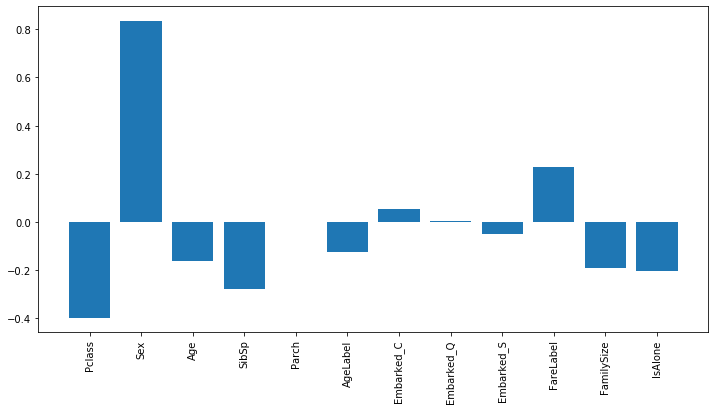

In [91]:
plt.figure(figsize=(12,6))
plt.bar([x for x in range(len(importance))], importance.Correlation.values)
plt.xticks([x for x in range(len(importance))], X.columns, rotation=90)
plt.show()

__Decision Tree__

O algoritmo de árvore de decisão é um algoritmo de classificação eficaz e simples de interpretar e usar em dados. A ideia da árvore de decisão é dividir o conjunto de dados inicial (raiz) em menores conjuntos (folhas) através de regras como respostas VERDADEIRO ou FALSO.

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=7, random_state=147)
dt_model.fit(X_train_std, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=147, splitter='best')

In [93]:
scores = cross_val_score(dt_model, X_train_std, y_train, cv=10)
scores

array([0.8358209 , 0.80597015, 0.7761194 , 0.80597015, 0.80597015,
       0.79104478, 0.7761194 , 0.8358209 , 0.83333333, 0.74242424])

In [94]:
y_pred = dt_model.predict(X_test_std)
y_real = y_test.values

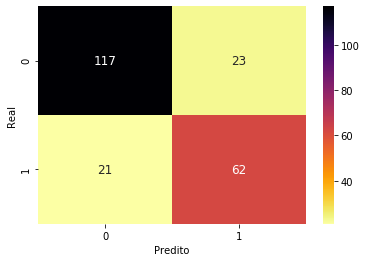

In [95]:
df_cm = pd.DataFrame({'y_real': y_real, 'y_pred': y_pred})
cm = pd.crosstab(df_cm['y_real'], df_cm['y_pred'], rownames=['Real'], colnames=['Predito'])
sns.heatmap(cm, annot=True, annot_kws={'size': 12}, fmt='d', cmap='inferno_r')
plt.show()

In [96]:
print(classification_report(y_real, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       140
           1       0.73      0.75      0.74        83

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [97]:
gridsearch_dt = dict()
gridsearch_dt['max_depth'] = list(range(11))

gridsearch_dt

{'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [98]:
search = RandomizedSearchCV(dt_model, gridsearch_dt, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5, random_state=147, verbose=1)

In [99]:
result = search.fit(X_train_std, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


C:\Users\Felipe Gollino\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 11 is smaller than n_iter=500. Running 11 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score: 0.8143418247110313
Best Hyperparameters: {'max_depth': 5}


[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.2s finished


[0.86567164 0.79104478 0.80597015 0.76119403 0.82089552 0.79104478
 0.74626866 0.8358209  0.83333333 0.71212121]


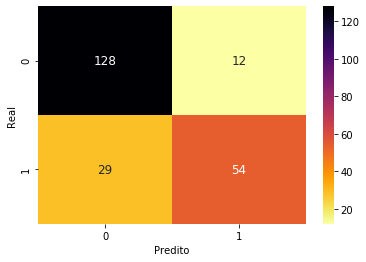

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       140
           1       0.82      0.65      0.72        83

    accuracy                           0.82       223
   macro avg       0.82      0.78      0.79       223
weighted avg       0.82      0.82      0.81       223



In [100]:
dt_model_pos = DecisionTreeClassifier(max_depth=5, random_state=147)
dt_model_pos.fit(X_train_std, y_train)

scores = cross_val_score(dt_model_pos, X_train_std, y_train, cv=10)
print(scores)

y_pred = dt_model_pos.predict(X_test_std)

df_cm = pd.DataFrame({'y_real': y_real, 'y_pred': y_pred})
cm = pd.crosstab(df_cm['y_real'], df_cm['y_pred'], rownames=['Real'], colnames=['Predito'])
sns.heatmap(cm, annot=True, annot_kws={'size': 12}, fmt='d', cmap='inferno_r')
plt.show()

print(classification_report(y_real, y_pred))

In [101]:
accuracy_score(y_real, y_pred)

0.8161434977578476

In [102]:
importance = pd.DataFrame(feature_names)
importance.columns = ['Feature']
importance["Correlation"] = pd.Series(dt_model_pos.feature_importances_)

importance.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,0.566939
0,Pclass,0.164019
2,Age,0.118751
10,FamilySize,0.105492
9,FareLabel,0.033348
5,AgeLabel,0.009098
4,Parch,0.002353
3,SibSp,0.000000
6,Embarked_C,0.000000
7,Embarked_Q,0.000000


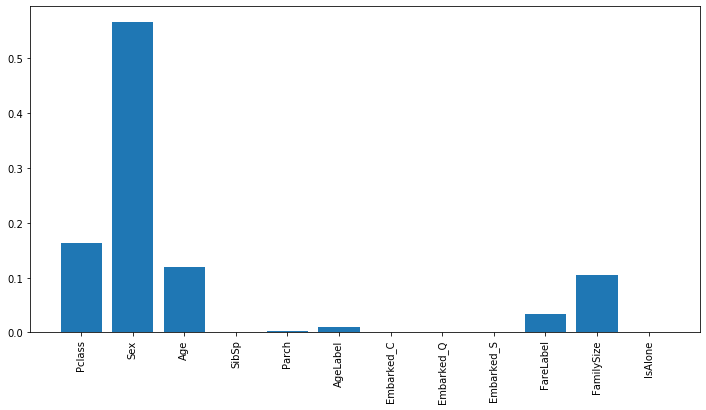

In [103]:
plt.figure(figsize=(12,6))
plt.bar([x for x in range(len(importance))], importance.Correlation.values)
plt.xticks([x for x in range(len(importance))], X.columns, rotation=90)
plt.show()

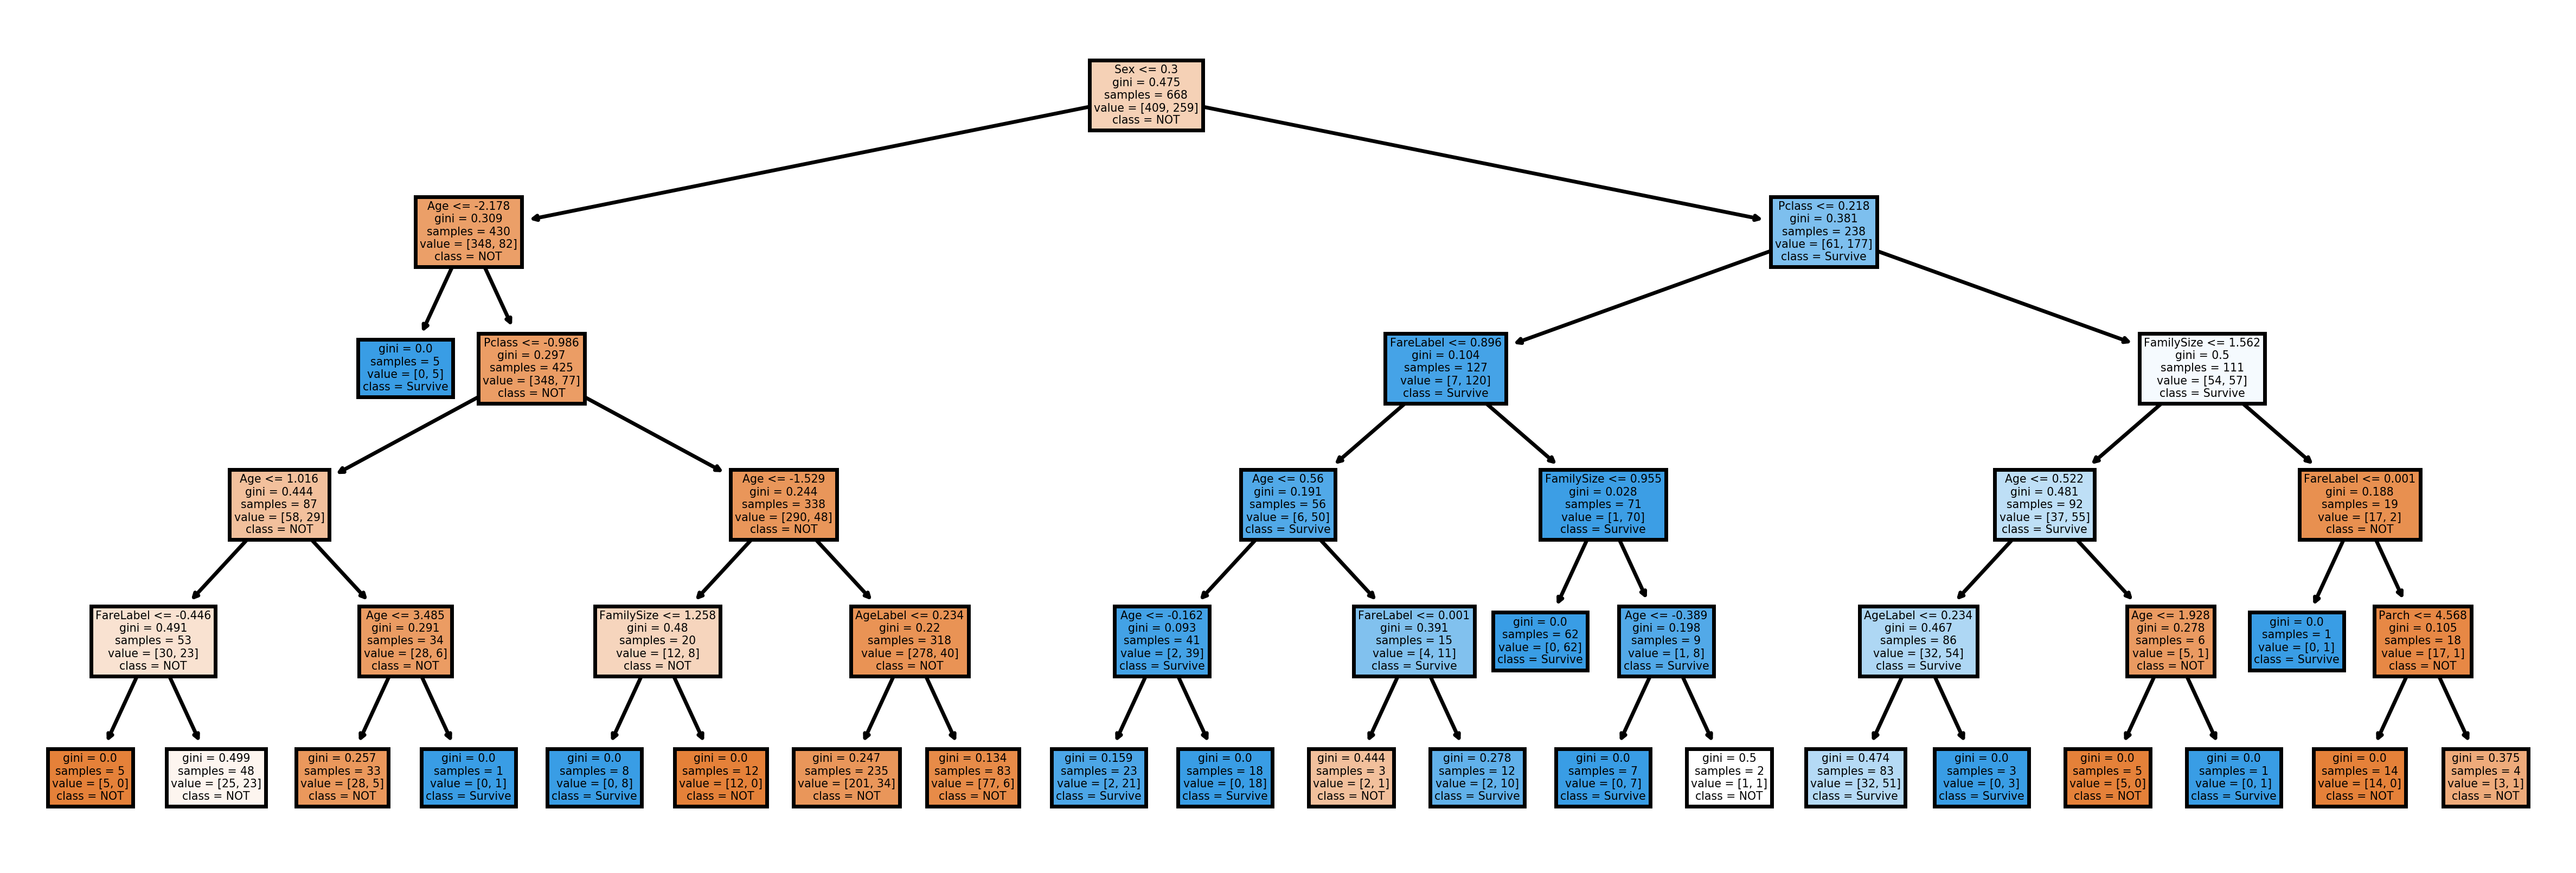

In [104]:
from sklearn import tree

fn = list(X.columns)
cn = ['NOT','Survive']

plt.figure(figsize=(12,4), dpi=500)
tree.plot_tree(dt_model_pos,
               filled=True,
               feature_names=fn,
               class_names=cn);

__Support Vector Machine__

Support Vector Machines é talvez um dos mais populares e falados algoritmos de aprendizado de máquina. É principalmente um método que executa tarefas de classificação construindo hiperplanos em um espaço multidimensional que separa casos de rótulos de classes diferentes. SVM suporta tarefas de regressão e classificação e pode lidar com múltiplas variáveis contínuas e categóricas

__SVM - linear__

In [105]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear')
svm_model_linear.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [106]:
scores = cross_val_score(svm_model_linear, X_train_std, y_train, cv=10)
scores

array([0.82089552, 0.7761194 , 0.79104478, 0.88059701, 0.76119403,
       0.80597015, 0.74626866, 0.80597015, 0.77272727, 0.77272727])

In [107]:
y_pred = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)

0.7982062780269058


__SVM - polinomial__

In [108]:
svm_model_poly = SVC(kernel = 'poly')
svm_model_poly.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [109]:
scores = cross_val_score(svm_model_poly, X_train_std, y_train, cv=10)
scores

array([0.8358209 , 0.82089552, 0.79104478, 0.86567164, 0.76119403,
       0.76119403, 0.68656716, 0.82089552, 0.84848485, 0.75757576])

In [110]:
y_pred = svm_model_poly.predict(X_test)
accuracy = svm_model_poly.score(X_test, y_test)
print(accuracy)

0.6547085201793722


__SVM - função de base radial (RBF)__

In [111]:
svm_model_rbf = SVC(kernel = 'rbf')
svm_model_rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [112]:
scores = cross_val_score(svm_model_rbf, X_train_std, y_train, cv=10)
scores

array([0.86567164, 0.82089552, 0.79104478, 0.8358209 , 0.79104478,
       0.80597015, 0.76119403, 0.8358209 , 0.86363636, 0.77272727])

In [113]:
y_pred = svm_model_rbf.predict(X_test)
accuracy = svm_model_rbf.score(X_test, y_test)
print(accuracy)

0.6681614349775785


__SVM - sigmoidal__

In [114]:
svm_model_sigmoid = SVC(kernel = 'sigmoid')
svm_model_sigmoid.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [115]:
scores = cross_val_score(svm_model_sigmoid, X_train_std, y_train, cv=10)
scores

array([0.7761194 , 0.68656716, 0.80597015, 0.59701493, 0.68656716,
       0.68656716, 0.65671642, 0.80597015, 0.68181818, 0.62121212])

In [116]:
y_pred = svm_model_sigmoid.predict(X_test)
accuracy = svm_model_sigmoid.score(X_test, y_test)
print(accuracy)

0.6278026905829597


__Naive Bayes Algorithm__

Um classificador naive bayes não é um algoritmo único, mas uma família de algoritmos de aprendizado de máquina que usam a teoria da probabilidade para classificar dados com uma suposição de independência entre preditores.

In [117]:
from sklearn.naive_bayes import GaussianNB
nb_model_gaussian = GaussianNB()
nb_model_gaussian.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [118]:
scores = cross_val_score(nb_model_gaussian, X_train_std, y_train, cv=10)
scores

array([0.80597015, 0.71641791, 0.7761194 , 0.74626866, 0.74626866,
       0.7761194 , 0.73134328, 0.82089552, 0.75757576, 0.71212121])

In [119]:
y_pred = nb_model_gaussian.predict(X_test)
accuracy = nb_model_gaussian.score(X_test, y_test)
print(accuracy)

0.7713004484304933


In [120]:
from sklearn.naive_bayes import BernoulliNB
nb_model_bernoulli = BernoulliNB()
nb_model_bernoulli.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [121]:
scores = cross_val_score(nb_model_bernoulli, X_train_std, y_train, cv=10)
scores

array([0.67164179, 0.68656716, 0.7761194 , 0.82089552, 0.68656716,
       0.67164179, 0.62686567, 0.73134328, 0.75757576, 0.75757576])

In [122]:
y_pred = nb_model_bernoulli.predict(X_test)
accuracy = nb_model_bernoulli.score(X_test, y_test)
print(accuracy)

0.7623318385650224


__KNN__

KNN não aprende nenhum modelo. ele armazena todo o conjunto de dados de treinamento que ele utiliza como sua representação. A saída pode ser calculada como a classe com a frequência mais alta das K-instâncias mais semelhantes (mais próximas).

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [124]:
scores = cross_val_score(knn_model, X_train_std, y_train, cv=10)
scores

array([0.82089552, 0.76119403, 0.71641791, 0.74626866, 0.7761194 ,
       0.76119403, 0.79104478, 0.85074627, 0.8030303 , 0.71212121])

In [125]:
y_pred = knn_model.predict(X_test)
accuracy = knn_model.score(X_test, y_test)
print(accuracy)

0.757847533632287


__Perceptron__

Rede neural de uma única camada oculta.

In [126]:
from sklearn.linear_model import Perceptron
nn_model = Perceptron(tol=1e-3)
nn_model.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [127]:
scores = cross_val_score(nn_model, X_train_std, y_train, cv=10)
scores

array([0.79104478, 0.62686567, 0.68656716, 0.6119403 , 0.62686567,
       0.50746269, 0.67164179, 0.73134328, 0.8030303 , 0.75757576])

In [128]:
y_pred = nn_model.predict(X_test)
accuracy = nn_model.score(X_test, y_test)
print(accuracy)

0.726457399103139


__Random Forest__

A floresta randômica é uma conjunto de árvores de decisão (floresta) obtendo uma previsão mais precisa e estável. Pode ser usado para problemas de classificação e regressão.

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=7)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [130]:
scores = cross_val_score(rf_model, X_train_std, y_train, cv=10)
scores

array([0.86567164, 0.80597015, 0.79104478, 0.80597015, 0.79104478,
       0.7761194 , 0.76119403, 0.86567164, 0.86363636, 0.72727273])

In [131]:
y_pred = rf_model.predict(X_test)
accuracy = rf_model.score(X_test, y_test)
print(accuracy)

0.8385650224215246


In [132]:
rf_model.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=7, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=5534751, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=7, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=977746734, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=7, max_features=

In [133]:
print(len(rf_model.estimators_))

100


In [134]:
rf_model.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5534751, splitter='best')

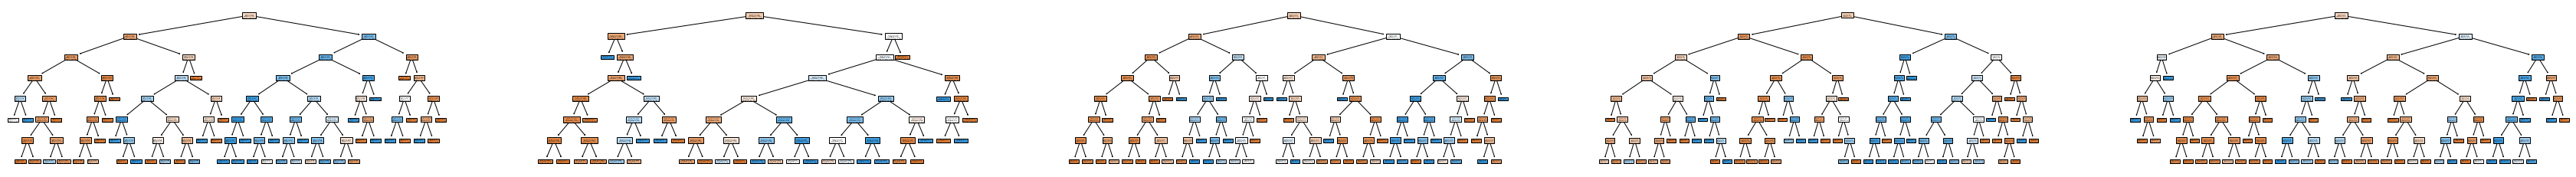

In [135]:
fig, axes = plt.subplots(1, 5, figsize=(60,4))
for index in range(5):
    tree.plot_tree(rf_model.estimators_[index], ax=axes[index], filled=True);

__Gradient Boosting__

O Gradient Boosting é um algoritmo onde converte o preditor fraco em forte. Nesta nova árvore é a metrica vai melhorando em relação a anterior.

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [137]:
scores = cross_val_score(gb_model, X_train_std, y_train, cv=10)
scores

array([0.86567164, 0.80597015, 0.82089552, 0.79104478, 0.79104478,
       0.80597015, 0.79104478, 0.8358209 , 0.77272727, 0.75757576])

In [138]:
y_pred = gb_model.predict(X_test)
accuracy = gb_model.score(X_test, y_test)
print(accuracy)

0.8430493273542601


In [139]:
gb_model.estimators_

array([[DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x2E5B4614E18,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x2E5B4614E18,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='

In [140]:
print(len(gb_model.estimators_))

100


In [141]:
gb_model.estimators_[0][0]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x2E5B4614E18,
                      splitter='best')

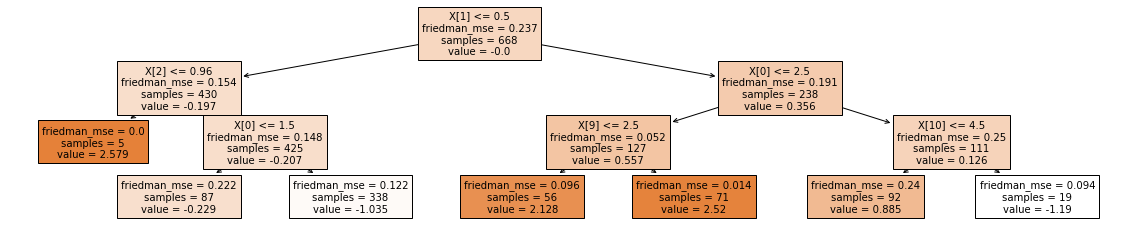

In [142]:
plt.figure(figsize=(20,4))
tree.plot_tree(gb_model.estimators_[0][0], filled=True)
plt.savefig('gb_tree.png')

In [143]:
gb_model.estimators_[-1][0]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x2E5B4614E18,
                      splitter='best')

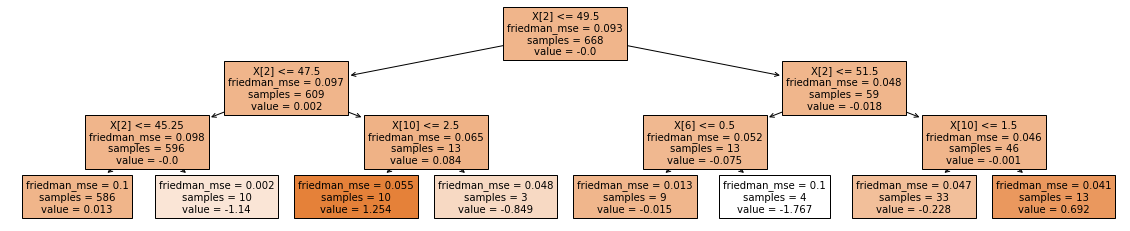

In [144]:
plt.figure(figsize=(20,4))
tree.plot_tree(gb_model.estimators_[-1][0], filled=True)
plt.savefig('gb_tree.png')

__Salvando o modelo__

In [145]:
import pickle
model_name = "model.pkl"  

MODEL = gb_model

with open(model_name, 'wb') as file:  
    pickle.dump(MODEL, file)

__Carregando modelo__

In [146]:
with open(model_name, 'rb') as file:  
    model_ressureto = pickle.load(file)

model_ressureto

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [147]:
gb_model.score(X_test, y_test)

0.8430493273542601

__Classificação Multiclasse__

In [148]:
from sklearn import datasets

iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names_iris = iris.feature_names
class_names_iris = iris.target_names

In [149]:
df_iris = pd.DataFrame(X_iris, columns=feature_names_iris)
df_iris['target'] = y_iris
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [150]:
df_iris.target.value_counts().sort_index()

0    50
1    50
2    50
Name: target, dtype: int64

In [151]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.25, random_state=147)

In [152]:
dt_iris_model = DecisionTreeClassifier(max_depth=2)
dt_iris_model.fit(X_train_iris, y_train_iris)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [153]:
scores = cross_val_score(dt_iris_model, X_train_std, y_train, cv=10)
scores

array([0.7761194 , 0.7761194 , 0.76119403, 0.65671642, 0.7761194 ,
       0.73134328, 0.71641791, 0.80597015, 0.77272727, 0.77272727])

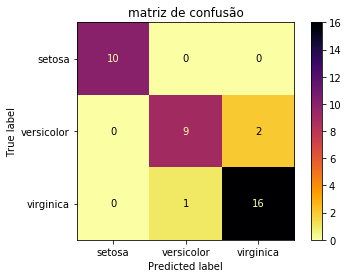

In [154]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(dt_iris_model,
                             X_test_iris,
                             y_test_iris,
                             display_labels=class_names_iris,
                             cmap='inferno_r',
                             normalize=None)
disp.ax_.set_title('matriz de confusão');

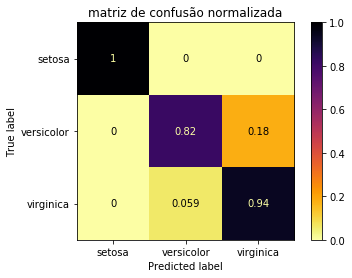

In [155]:
disp = plot_confusion_matrix(dt_iris_model,
                             X_test_iris,
                             y_test_iris,
                             display_labels=class_names_iris,
                             cmap='inferno_r',
                             normalize='true')
disp.ax_.set_title('matriz de confusão normalizada');

In [156]:
y_pred_iris = dt_iris_model.predict(X_test_iris)
accuracy = dt_iris_model.score(X_test_iris, y_test_iris)
print(accuracy)

0.9210526315789473


In [157]:
y_real_iris = y_test_iris
print(classification_report(y_real_iris, y_pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.82      0.86        11
           2       0.89      0.94      0.91        17

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



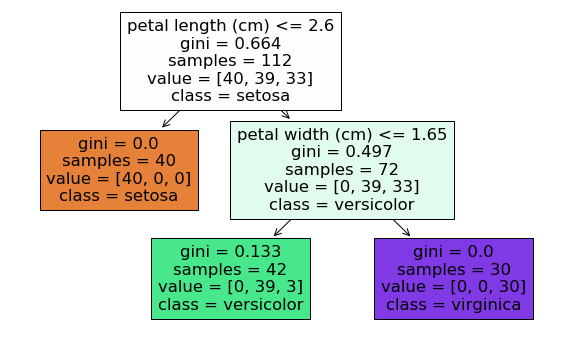

In [158]:
plt.figure(figsize=(10,6))
tree.plot_tree(dt_iris_model, feature_names=feature_names_iris, class_names=class_names_iris, filled=True)
plt.show();